# Quadratic Space Global Alignment

In [1]:
def originalres(s1,s2):
    len1 = len(s1)
    len2 = len(s2)
    dp = [[0 for j in range(len1 + 1)] for i in range(len2 + 1)]
    for i in range(len2 + 1):
        for j in range(len1 + 1):
            if i==0 and j==0:
                dp[i][j]=0
            elif i>0 and j==0:
                dp[i][j]=dp[i-1][j]-1
            elif i==0 and j>0:
                dp[i][j]=dp[i][j-1]-1
            else:
                score = 1 if s1[j-1]==s2[i-1] else -1
                dp[i][j] = max(dp[i-1][j]-1,max(dp[i][j-1]-1,dp[i-1][j-1]+score))
    return dp[len2]

In [2]:
def originalscore(s1,s2):
    len1 = len(s1)
    len2 = len(s2)
    dp = [[0 for j in range(len1 + 1)] for i in range(len2 + 1)]
    for i in range(len2 + 1):
        for j in range(len1 + 1):
            if i==0 and j==0:
                dp[i][j]=0
            elif i>0 and j==0:
                dp[i][j]=dp[i-1][j]-1
            elif i==0 and j>0:
                dp[i][j]=dp[i][j-1]-1
            else:
                score = 0 if s1[j-1]==s2[i-1] else -1
                dp[i][j] = max(dp[i-1][j]-1,max(dp[i][j-1]-1,dp[i-1][j-1]+score))
    i = len2
    j = len1
    res = []
    res.append((i,j))
    while i>0 or j>0:
        if i>0 and dp[i][j] == dp[i-1][j]-1:
            i-=1
        elif j>0 and dp[i][j]==dp[i][j-1]-1:
            j-=1
        else:
            i -= 1
            j -=1
        res.append((i,j))
    res.sort(key=lambda x: (x[0],x[1]))
    return res

In [3]:
sequence_1 = "ATGTTAT"
sequence_2 = "ATCGTAC"

print("alignment:", originalscore(sequence_1, sequence_2))
print("score:", originalres(sequence_1, sequence_2)[-1])

alignment: [(0, 0), (1, 1), (2, 2), (3, 2), (4, 3), (5, 4), (5, 5), (6, 6), (7, 7)]
score: 2


# Linear Space Algorithm

In [4]:
def linearspacescore(s1, s2):
    len1 = len(s1)
    len2 = len(s2)
    dp = [[0 for j in range(len1 + 1)] for i in range(2)]
    curridx = 0
    for i in range(len2 + 1):
        for j in range(len1 + 1):
            if i==0 and j==0:
                dp[curridx][j]=0
            elif i>0 and j==0:
                dp[curridx][j]=dp[1-curridx][j]-1
            elif i==0 and j>0:
                dp[curridx][j]=dp[curridx][j-1]-1
            else:
                score = 1 if s1[j-1] == s2[i-1] else -1
                dp[curridx][j] = max(dp[1-curridx][j]-1,max(dp[curridx][j-1]-1,dp[1-curridx][j-1]+score))
        curridx = 1-curridx
    return dp[1-curridx]

print('score:', linearspacescore(sequence_1, sequence_2)[-1])

score: 2


In [5]:
def hirschbergrecur(s1,s2,i,j,ip,jp,res):
    # i,j,ip,jp are all inclusive i.e. s1[i.....ip) and s2[j.....jp) and 1-indexed
    if jp-j==1:
        res.append((i, j))
        res.append((ip, jp))
        return
    if jp - j < 1:
      return
    mid = int((j+jp)/2)
    prefix = linearspacescore(s1[i:ip:],s2[j:mid:])
    suffix = linearspacescore(s1[i:ip:][::-1],s2[mid:jp:][::-1])
    assert prefix == originalres(s1[i:ip:],s2[j:mid:])
    assert suffix == originalres(s1[i:ip:][::-1],s2[mid:jp:][::-1])
    assert len(prefix) == len(suffix)
    maxidx = -1
    maxweight = -1
    for idx in range(len(prefix)):
        weight = prefix[idx] + suffix[-idx-1]
        if maxidx == -1 or maxweight <= weight:
            maxidx = idx
            maxweight = weight
    res.append((maxidx+i, mid))
    hirschbergrecur(s1,s2,i,j,maxidx+i,mid,res)
    hirschbergrecur(s1,s2,maxidx+i,mid,ip,jp,res)


In [6]:
def hirschberg(s1,s2):
    res = []
    len1 = len(s1)
    len2 = len(s2)
    hirschbergrecur(s1,s2,0,0,len1,len2,res)
    res = list(set(res))
    res.sort(key=lambda x: (x[0],x[1]))
    return res

print(hirschberg('CT', 'GCAT'))

[(0, 0), (0, 1), (1, 2), (1, 3), (2, 4)]


In [7]:
print(hirschberg(sequence_1, sequence_2))

[(0, 0), (1, 1), (2, 2), (2, 3), (4, 4), (5, 5), (6, 6), (7, 7)]


# Reconstruct the path

In [8]:
def reconstruct_path(s1, s2, cells):
  len1 = len(s1)
  len2 = len(s2)
  dp = [[0 for j in range(len1 + 1)] for i in range(2)]
  curridx = 0
  for i in range(len2 + 1):
      for j in range(len1 + 1):
          if i==0 and j==0:
              dp[curridx][j]=0
          elif i>0 and j==0:
              dp[curridx][j]=dp[1-curridx][j]-1
          elif i==0 and j>0:
              dp[curridx][j]=dp[curridx][j-1]-1
          else:
              score = 1 if s1[j-1] == s2[i-1] else -1
              dp[curridx][j] = max(dp[1-curridx][j]-1,max(dp[curridx][j-1]-1,dp[1-curridx][j-1]+score))
      curridx = 1-curridx
      
      left = curridx
      right = 1 - curridx
      
      # fill in missing cells
      if i > 0 and cells[i][0] - cells[i - 1][0] > 1:
        start_cell = cells[i - 1]
        start_row, start_col = start_cell

        end_cell = cells[i]
        end_row, end_col = end_cell
        
        stack = []
        stack.append(start_cell)
        bt = {}
        
        # shortest path from start cell to end cell given constraint
        while True:
          current_cell = stack.pop()
          cell_row, cell_col = current_cell

          if current_cell == end_cell:
            break

          # go right
          if cell_col < end_col and dp[left][cell_row] - 1 == dp[right][cell_row]:
            next_cell = (cell_row, cell_col + 1)
            stack.append(next_cell)
            bt[next_cell] = current_cell
            
          # go down
          column = right if cell_col == end_col else left
          if cell_row < end_row and dp[column][cell_row] - 1 == dp[column][cell_row + 1]:
            next_cell = (cell_row + 1, cell_col)
            stack.append(next_cell)
            bt[next_cell] = current_cell
            
          # go diagonal - match
          if cell_row < end_row and cell_col < end_col and s1[cell_row] == s2[cell_col] and dp[left][cell_row] + 1 == dp[right][cell_row + 1]:
            new_cell = (cell_row + 1, cell_col + 1)
            stack.append(new_cell)
            bt[new_cell] = current_cell
            
          # go diagonal - mismatch
          if cell_row < end_row and cell_col < end_col and s1[cell_row] != s2[cell_col] and dp[left][cell_row] - 1 == dp[right][cell_row + 1]:
            new_cell = (cell_row + 1, cell_col + 1)
            stack.append(new_cell)
            bt[new_cell] = current_cell
            
        # backtrace
        current_cell = bt[end_cell]
        while current_cell != start_cell:
          cells.append(current_cell)
          current_cell = bt[current_cell]

  return sorted(cells)

reconstruct_path(sequence_1, sequence_2, hirschberg(sequence_1, sequence_2))

[(0, 0), (1, 1), (2, 2), (2, 3), (3, 4), (4, 4), (5, 5), (6, 6), (7, 7)]

# Simple Visualization

In [9]:
def originalres_whole_table(s1,s2): # temp function just for displaying
    len1 = len(s1)
    len2 = len(s2)
    dp = [[0 for j in range(len1 + 1)] for i in range(len2 + 1)]
    for i in range(len2 + 1):
        for j in range(len1 + 1):
            if i==0 and j==0:
                dp[i][j]=0
            elif i>0 and j==0:
                dp[i][j]=dp[i-1][j]-1
            elif i==0 and j>0:
                dp[i][j]=dp[i][j-1]-1
            else:
                score = 1 if s1[j-1]==s2[i-1] else -1
                dp[i][j] = max(dp[i-1][j]-1,max(dp[i][j-1]-1,dp[i-1][j-1]+score))
    return dp

In [10]:
from IPython.display import HTML

def get_html_string(s1, s2, cells=None, title=""):
  if cells is None:
    result = reconstruct_path(s1, s2, hirschberg(s1, s2))
  else:
    result = cells
  dp = originalres_whole_table(s2, s1)
  s1 = "-" + s1
  s2 = "-" + s2
  
  table_str = "<h3>{}</h3>".format(title)
  for row in range(len(s1) + 1):
    if row == 0:
      table_str += """
        <tr>
        <td><td>
        {}
        </tr>
      """.format(
          "\n".join(["<td style='width: 50px; height: 50px; text-align: center'>{}<td>".format(c) for c in s2])
      )
    else:
      table_str += """
        <tr>
        <td style='width: 50px; height: 50px; text-align: center'>{1}<td>
        {0}
        </tr>
      """.format(
          "\n".join(["<td style='width: 50px; height: 50px; text-align: center{highlight}'>{}<td>".format(dp[row - 1][col], 
                                    highlight="; background-color: yellow" if (row - 1, col) in result else "") for col, c in enumerate(s2)]), 
          s1[row - 1]
        )


  html_str = """
  <table style="font-size: 15px">
  {}
  </table>
  """.format(table_str)
  
  # print(result)
  return html_str


In [11]:
HTML(get_html_string('CT', 'GCAT'))

In [12]:
HTML(get_html_string(sequence_1, sequence_2, hirschberg(sequence_1, sequence_2), title="Reported cells"))

In [13]:
path = reconstruct_path(sequence_1, sequence_2, hirschberg(sequence_1, sequence_2))
HTML(get_html_string(sequence_1, sequence_2, path, title="Reconstructed path"))

# Correctness Validaton

In [14]:
path = [(t1, t0) for t0, t1 in originalscore(sequence_1, sequence_2)]
HTML(get_html_string(sequence_1, sequence_2, path, title='Global Sequence Alignment'))

In [15]:
path = reconstruct_path(sequence_1, sequence_2, hirschberg(sequence_1, sequence_2))
HTML(get_html_string(sequence_1, sequence_2, path, title='Linear Space Algorithm'))

## Dissimilar Pair

In [16]:
sequence_1 = 'ATGCTA'
sequence_2 = 'GGTT'

path = [(t1, t0) for t0, t1 in originalscore(sequence_1, sequence_2)]
HTML(get_html_string(sequence_1, sequence_2, path, title='Global Sequence Alignment'))

In [17]:
path = reconstruct_path(sequence_1, sequence_2, hirschberg(sequence_1, sequence_2))
HTML(get_html_string(sequence_1, sequence_2, path, title='Linear Space Algorithm'))

# Interactive Demo

In [18]:
#@title Parameters
sequence_1 = "AGCTA" #@param {type: "string"}
sequence_2 = "ACGAC" #@param {type: "string"}

In [19]:
path = reconstruct_path(sequence_1, sequence_2, hirschberg(sequence_1, sequence_2))
HTML(get_html_string(sequence_1, sequence_2, path))

# Correctness Validation

In [20]:
def reconstruct_path(s1,s2):
    score = hirschberg(s1, s2)
    seq1 = ""
    seq2 = ""
    for s in score:
        if (s == (0,0)):
            temp = s
            continue
        else:
            if(s[0]-temp[0] == 0):
                seq1 += "-"
                seq2 += s2[s[1]-1]
            elif(s[0]-temp[0] == 1):
                seq1 += s1[s[0]-1]
                seq2 += s2[s[1]-1]
            else:
                seq1 += s1[temp[0]]
                seq2 += s2[temp[1]]
                for j in range(s[0]-temp[0]-1):
                    seq2 += "-"
                    seq1 += s1[temp[0]+1+j]
            temp = s
    return (seq1,seq2)

In [24]:
reconstruct_path(sequence_1,sequence_2)

('AGCTA-', 'A-CGAC')

In [25]:
disseq_1 = "ATGCTA"
disseq_2 = "GGTT"
reconstruct_path(disseq_1,disseq_2)

('ATGCTA', 'G--GTT')

# Analyze space complexity

In [26]:
!pip install -U memory_profiler

  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-cp36-none-any.whl size=30181 sha256=d4522d3383926872eb2b00203e957c577d30adab4e0aee447b2be2ab6112b0fd
  Stored in directory: /root/.cache/pip/wheels/02/e4/0b/aaab481fc5dd2a4ea59e78bc7231bb6aae7635ca7ee79f8ae5
Successfully built memory-profiler


In [34]:
keys = ['A', 'C', 'T', 'G', '-']

# Previous quadratic space sequence alignment from homework
def traceback_global(v, w, pointers):
    i,j = len(v), len(w)
    new_v = []
    new_w = []
    while True:
        di, dj = pointers[i][j]
        if (di,dj) == LEFT:
            new_v.append('-')
            new_w.append(w[j-1])
        elif (di,dj) == UP:
            new_v.append(v[i-1])
            new_w.append('-')
        elif (di,dj) == TOPLEFT:
            new_v.append(v[i-1])
            new_w.append(w[j-1])
        i, j = i + di, j + dj
        if (i <= 0 and j <= 0):
            break
    return ''.join(new_v[::-1])+'\n'+''.join(new_w[::-1])

def score_helper(vi,wj,delta):
  return delta[vi][wj]

delta = {}
for i in range(len(keys)):
    delta[keys[i]] = {k : v for (k,v) in zip(keys, [1 if keys[i] == keys[j]  else -1 for j in range(len(keys))])}
    
def global_align(v, w):
    """
    Returns the score of the maximum scoring alignment of the strings v and w, as well as the actual alignment as 
    computed by traceback_global. 
    
    :param: v
    :param: w
    :param: delta
    """
    
    M = [[0 for j in range(len(w)+1)] for i in range(len(v)+1)]
    pointers = [[ORIGIN for j in range(len(w)+1)] for i in range(len(v)+1)]
    score, alignment = None, None
    # YOUR CODE HERE
    i = 0
    j = 0

    for i in range(len(v)+1):
      for j in range(len(w)+1):
        if ((i == 0) & (j == 0)):
          continue
        if ((i == 0) & (j > 0)):
          M[i][j] = score_helper('-',w[j-1],delta) + M[i][j-1]
          pointers[i][j] = LEFT
        if ((i > 0) & (j == 0)):
          M[i][j] = score_helper(v[i-1],'-',delta) + M[i-1][j]
          pointers[i][j] = UP
        if ((i > 0) & (j > 0)):
          s1 = score_helper('-',w[j-1],delta) + M[i][j-1] # LEFT
          s2 = score_helper(v[i-1],'-',delta) + M[i-1][j] # UP
          s3 = score_helper(v[i-1],w[j-1],delta) + M[i-1][j-1] # TOPLEFT
          l = [s1,s2,s3]
          if (max(l) == s1):
            M[i][j] = s1
            pointers[i][j] = LEFT
          elif (max(l) == s2):
            M[i][j] = s2
            pointers[i][j] = UP
          else:
            M[i][j] = s3
            pointers[i][j] = TOPLEFT
          
    alignment = traceback_global(v,w, pointers)
    score = M[i][j]
    # print(np.array(M))
    # print(np.array(pointers))
    return alignment

In [29]:
import memory_profiler
import random
%load_ext memory_profiler

In [30]:
%memit hirschberg(sequence_1, sequence_2) # Memory used by hirschberg

peak memory: 108.30 MiB, increment: 0.04 MiB


In [31]:
%memit -o global_align(sequence_1, sequence_2) # Memory used by Needleman

peak memory: 108.30 MiB, increment: 0.00 MiB


<MemitResult : peak memory: 108.30 MiB, increment: 0.00 MiB>

In [32]:
base = 1000
end = base * 4
interval = int(base/5)
letters = keys[:4]
meo1 = []
meo2 = []

t1 = []
t2 = []
for i in range(base,end,interval):
    test_seq1 = ""
    test_seq2 = ""
    for j in range(i):
        test_seq1 = test_seq1 + random.choice(letters)
        test_seq2 = test_seq2 + random.choice(letters)
    x = %memit -o hirschberg(test_seq1, test_seq2)
    y = %memit -o global_align(test_seq1, test_seq2)
    
    memory_hir = x.mem_usage[0] - x.baseline
    memory_ned = y.mem_usage[0] - y.baseline
    
    meo1.append(memory_hir)
    meo2.append(memory_ned)

peak memory: 124.30 MiB, increment: 15.95 MiB
peak memory: 149.03 MiB, increment: 35.34 MiB
peak memory: 147.47 MiB, increment: 18.93 MiB
peak memory: 169.99 MiB, increment: 40.26 MiB
peak memory: 164.54 MiB, increment: 22.51 MiB
peak memory: 186.48 MiB, increment: 44.17 MiB
peak memory: 177.56 MiB, increment: 30.81 MiB
peak memory: 222.24 MiB, increment: 74.93 MiB
peak memory: 207.70 MiB, increment: 40.17 MiB
peak memory: 240.59 MiB, increment: 71.89 MiB
peak memory: 223.41 MiB, increment: 49.29 MiB
peak memory: 275.65 MiB, increment: 100.99 MiB
peak memory: 251.70 MiB, increment: 59.00 MiB
peak memory: 308.26 MiB, increment: 114.79 MiB
peak memory: 279.27 MiB, increment: 71.21 MiB
peak memory: 366.07 MiB, increment: 157.21 MiB
peak memory: 328.29 MiB, increment: 83.17 MiB
peak memory: 404.20 MiB, increment: 158.59 MiB
peak memory: 360.58 MiB, increment: 96.58 MiB
peak memory: 441.70 MiB, increment: 176.86 MiB
peak memory: 387.24 MiB, increment: 112.74 MiB
peak memory: 536.07 MiB, inc

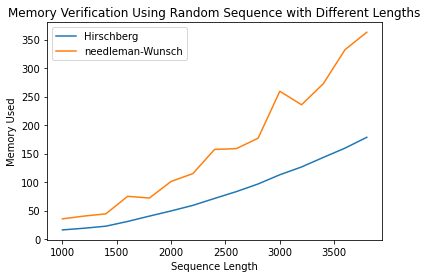

In [33]:
from matplotlib import pyplot as plt
plt.plot(range(base,end,interval),meo1,label = 'Hirschberg')
plt.plot(range(base,end,interval),meo2,label = 'needleman-Wunsch')
plt.xlabel('Sequence Length')
plt.ylabel('Memory Used')
plt.title('Memory Verification Using Random Sequence with Different Lengths')
plt.legend()